### Import data

In [71]:
data<-read.csv('compare.csv')
head(data)

date,hour,pm25,pm10,mytemp,myhumid,myavgpm25,myavgpm10
170101,100,27,32,NA,NA,NA,NA
170101,200,19,25,NA,NA,NA,NA
170101,300,16,23,NA,NA,NA,NA
170101,400,21,25,NA,NA,NA,NA
170101,500,19,25,NA,NA,NA,NA
170101,600,16,20,NA,NA,NA,NA


In [72]:
library(ggplot2)
library(dplyr)

### Change date format

use substring to separate y m d ระวังการใช้งาน substr ด้วย ไม่งั้นทุกแถวจะซ้ำกันหมด

In [73]:
data$y<-paste("20",substr(data[,'date'], 1, 2),sep="")
data$m<-substr(data[,'date'], 3, 4)
data$d<-substr(data[,'date'], 5, 6)

change to yyyy-mm-dd

In [80]:
data$date<-paste(data$y,data$m,data$d,sep="-")

create numrow for further use

In [82]:
data$numrow<-c(1:nrow(data))

add h column

In [84]:
data$h<-substr(data$hour,1,nchar(data$hour)-2)

### Plot all data

In [88]:
library(sqldf)

select numrow and date for crating graph label

In [129]:
rowstart<-sqldf('select numrow,date from data where h=1')

change to vector

In [130]:
rowstartdate<-rowstart[,1]
datelabel<-rowstart[,2]

In [131]:
rowstartdate

[1]    1   25   49   73   97  121  145  169  193  217  241  265  289  313  337
[16]  361  385  409  433  457  481  505  529  553  577  601  625  649  673  697
[31]  721  745  769  793  817  841  865  889  913  937  961  985 1009 1033 1057
[46] 1081 1105 1129 1153 1177 1201 1225 1249 1273 1297 1321 1345 1369 1393

In [132]:
datelabel

[1] "2017-01-01" "2017-01-02" "2017-01-03" "2017-01-04" "2017-01-05"
 [6] "2017-01-06" "2017-01-07" "2017-01-08" "2017-01-09" "2017-01-10"
[11] "2017-01-11" "2017-01-12" "2017-01-13" "2017-01-14" "2017-01-15"
[16] "2017-01-16" "2017-01-17" "2017-01-18" "2017-01-19" "2017-01-20"
[21] "2017-01-21" "2017-01-22" "2017-01-23" "2017-01-24" "2017-01-25"
[26] "2017-01-26" "2017-01-27" "2017-01-28" "2017-01-29" "2017-01-30"
[31] "2017-01-31" "2017-02-01" "2017-02-02" "2017-02-03" "2017-02-04"
[36] "2017-02-05" "2017-02-06" "2017-02-07" "2017-02-08" "2017-02-09"
[41] "2017-02-10" "2017-02-11" "2017-02-12" "2017-02-13" "2017-02-14"
[46] "2017-02-15" "2017-02-16" "2017-02-17" "2017-02-18" "2017-02-19"
[51] "2017-02-20" "2017-02-21" "2017-02-22" "2017-02-23" "2017-02-24"
[56] "2017-02-25" "2017-02-26" "2017-02-27" "2017-02-28"

Plot all data with date label

Warning message:
"Removed 183 rows containing missing values (geom_path)."

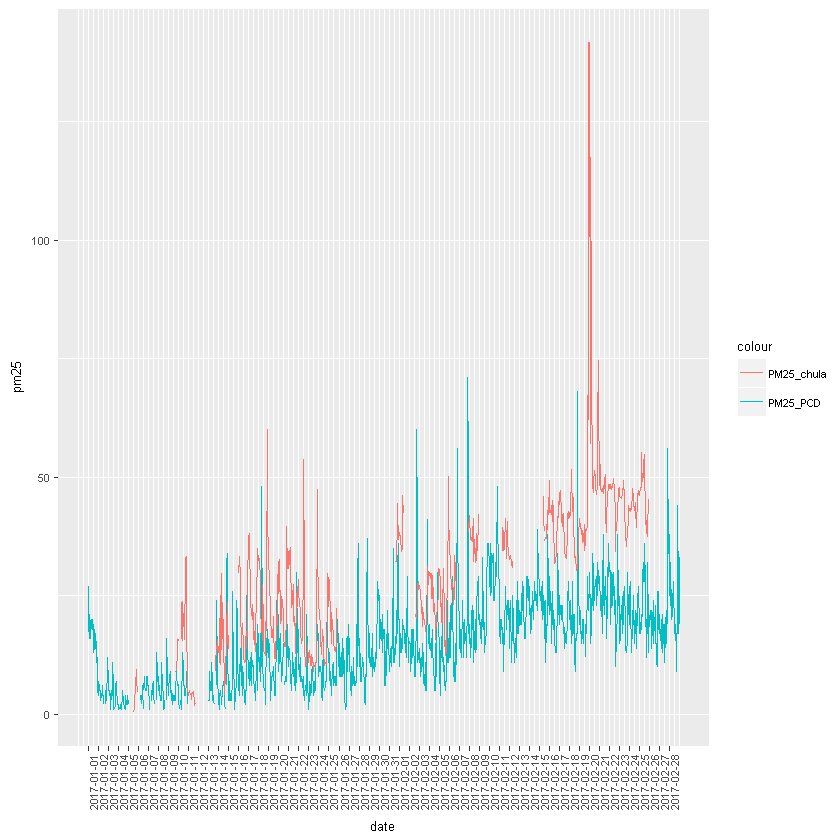

In [135]:
ggplot(data, aes(numrow)) + scale_x_continuous(name ="date", breaks = rowstartdate,label = datelabel) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
theme(text = element_text(size=8),axis.text.x = element_text(angle=90, hjust=1)) 

Plot day by day

In [160]:
sub1<-sqldf('select * from data where m="01"')
sub2<-sqldf('select * from data where m="02"')

In [176]:
sub1$dnum<-as.numeric(sub1$d)
sub2$dnum<-as.numeric(sub2$d)

In [174]:
sub1w1<-sqldf('select * from sub1 where dnum>=1 and dnum<=7')
sub1w2<-sqldf('select * from sub1 where dnum>=8 and dnum<=14')
sub1w3<-sqldf('select * from sub1 where dnum>=15 and dnum<=21')
sub1w4<-sqldf('select * from sub1 where dnum>=22 and dnum<=28')
sub1w5<-sqldf('select * from sub1 where dnum>=29 and dnum<=31')

Warning message:
"Removed 158 rows containing missing values (geom_path)."

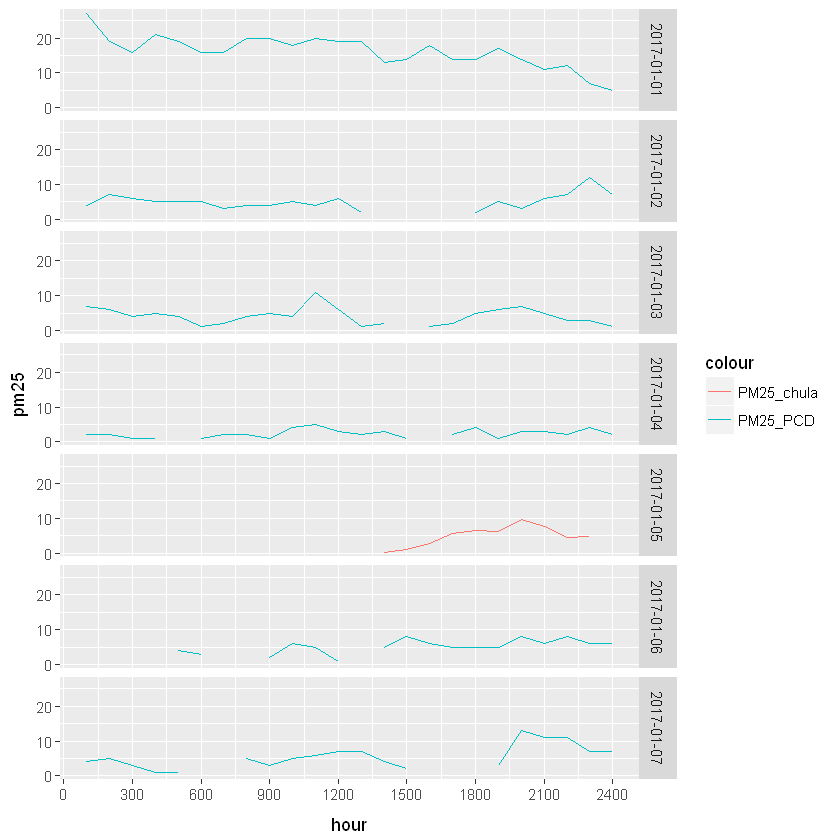

In [187]:
ggplot(sub1w1, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

Warning message:
"Removed 41 rows containing missing values (geom_path)."

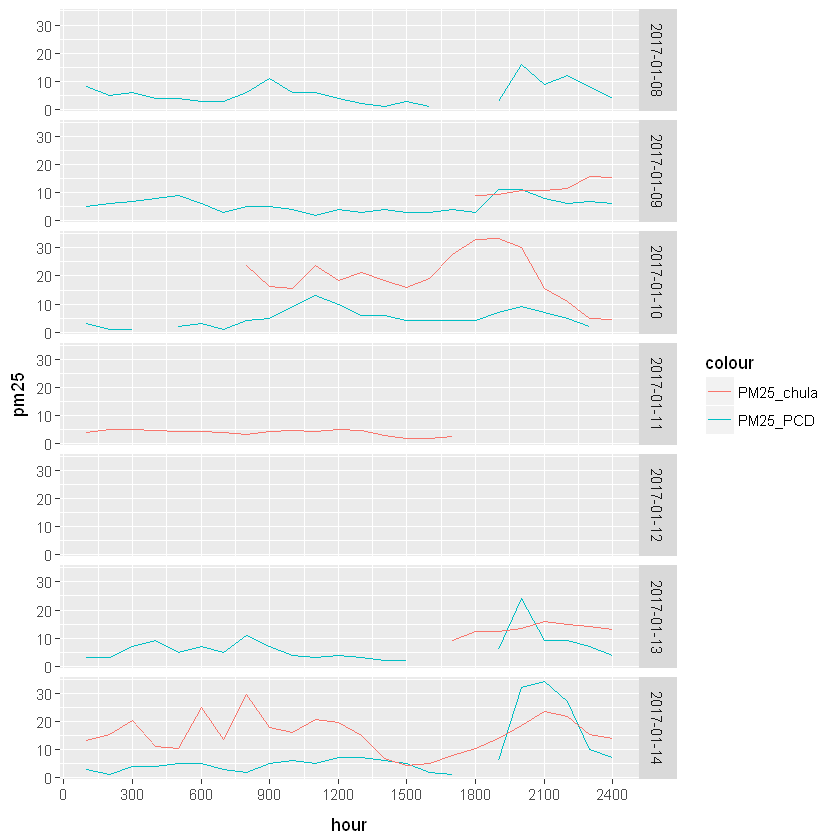

In [188]:
ggplot(sub1w2, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300))  + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

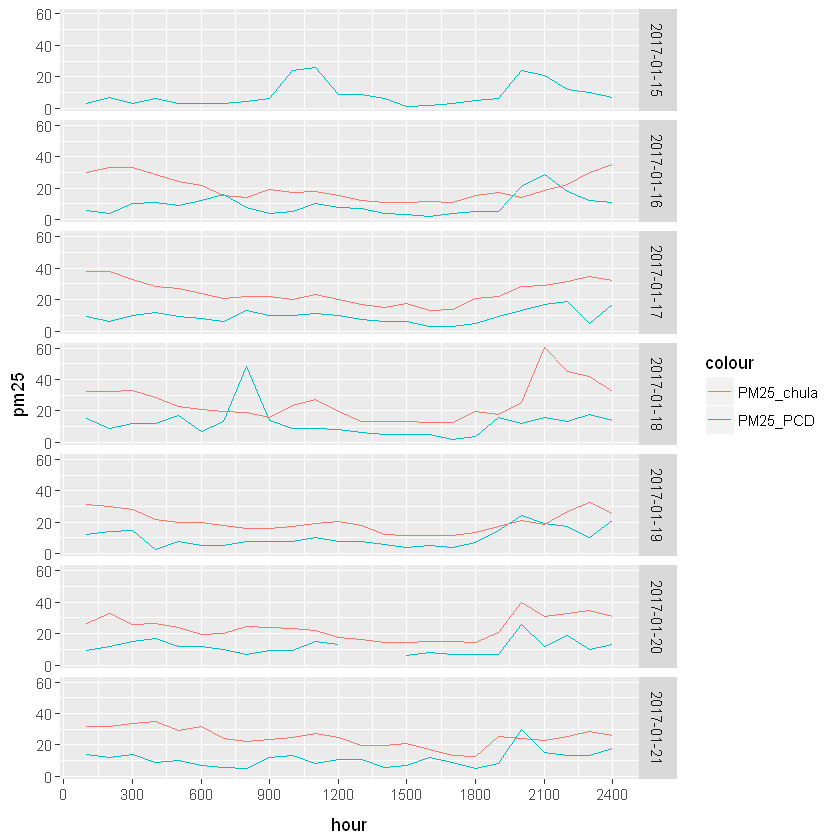

In [189]:
ggplot(sub1w3, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

Warning message:
"Removed 75 rows containing missing values (geom_path)."

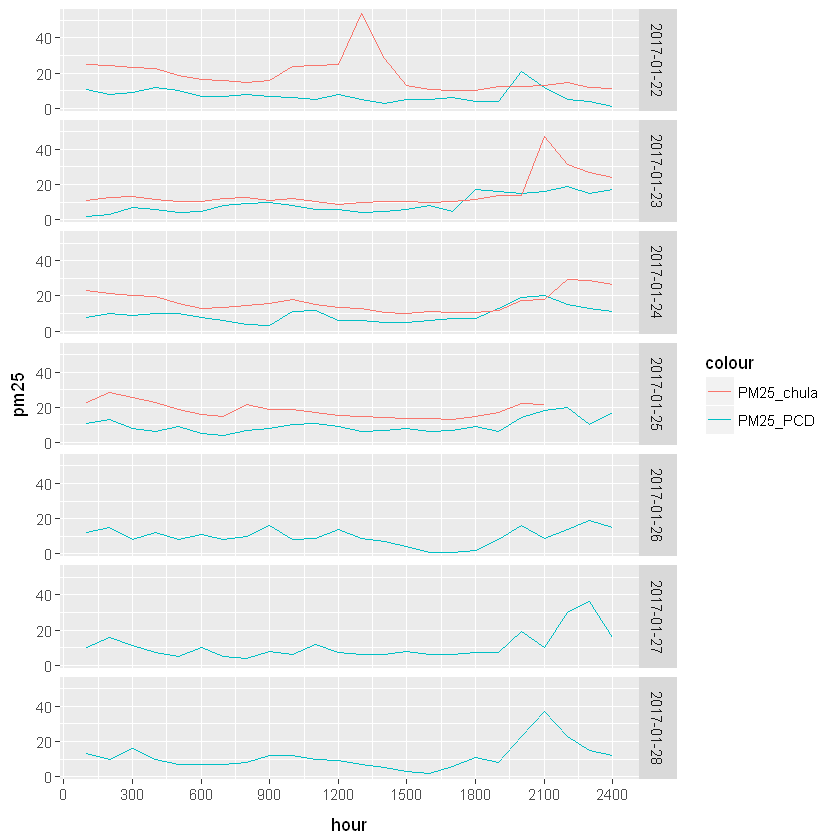

In [190]:
ggplot(sub1w4, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300))  + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

Warning message:
"Removed 64 rows containing missing values (geom_path)."

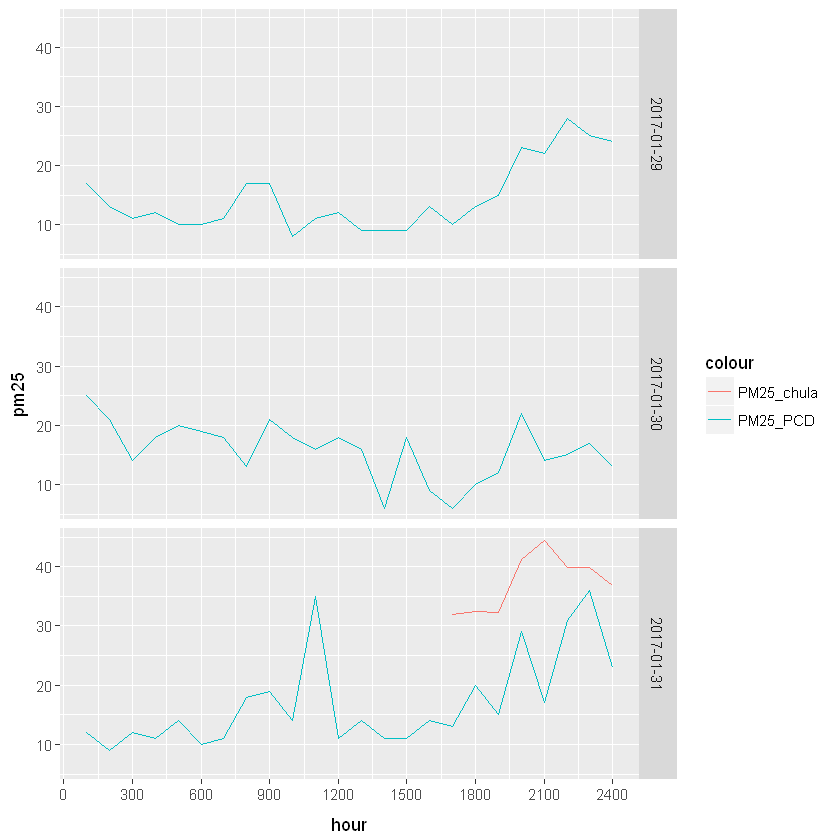

In [191]:
ggplot(sub1w5, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300))  + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

In [192]:
sub2w1<-sqldf('select * from sub2 where dnum>=1 and dnum<=4')
sub2w2<-sqldf('select * from sub2 where dnum>=5 and dnum<=11')
sub2w3<-sqldf('select * from sub2 where dnum>=12 and dnum<=18')
sub2w4<-sqldf('select * from sub2 where dnum>=19 and dnum<=25')
sub2w5<-sqldf('select * from sub2 where dnum>=26 and dnum<=28')

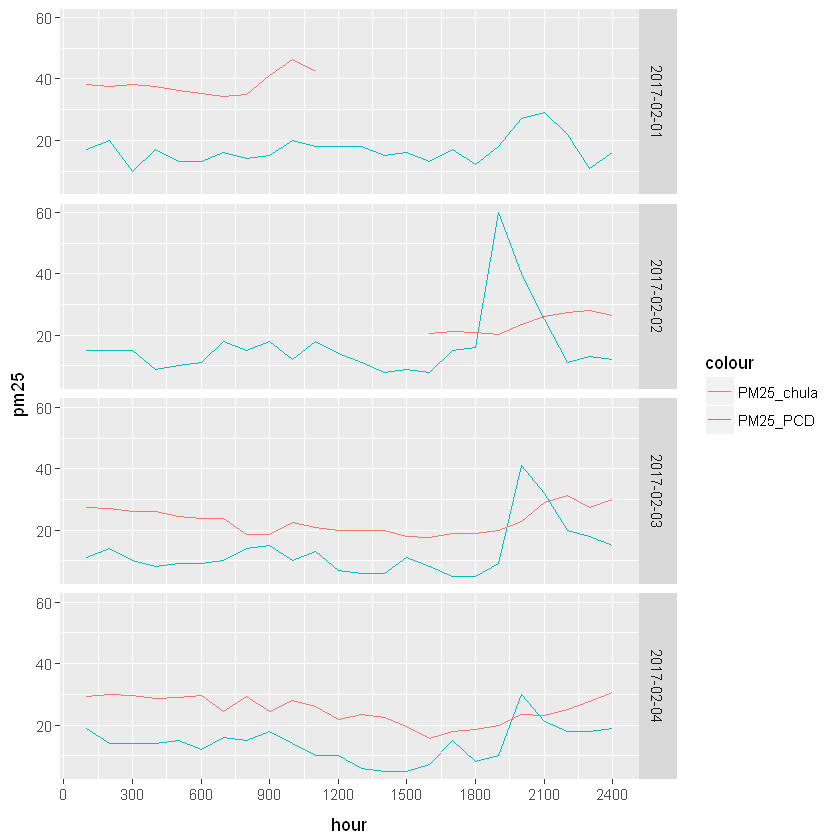

In [193]:
ggplot(sub2w1, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

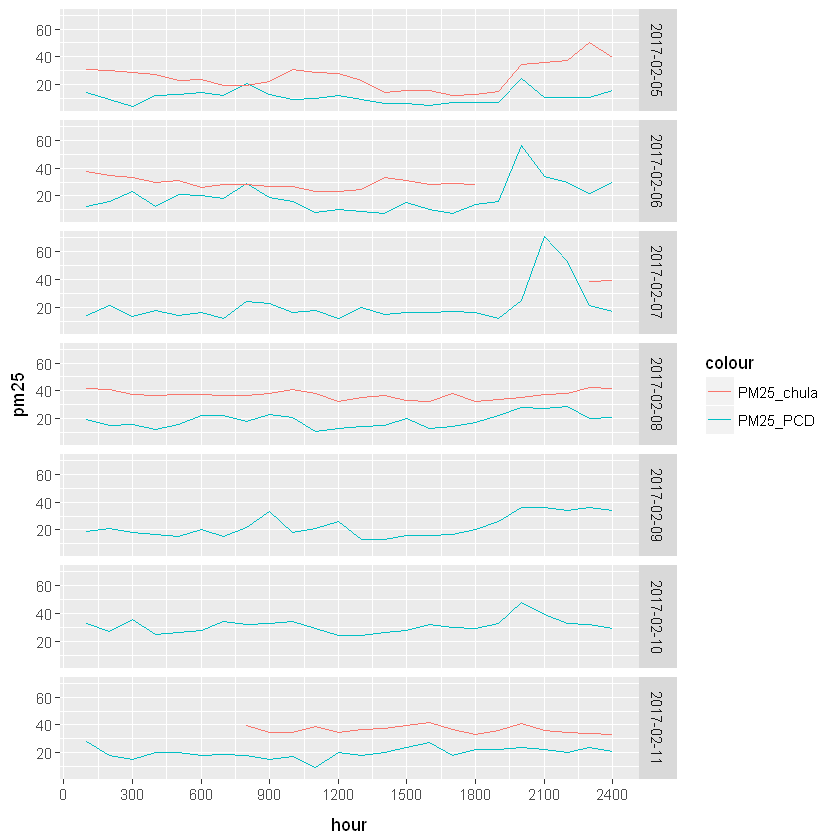

In [196]:
ggplot(sub2w2, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

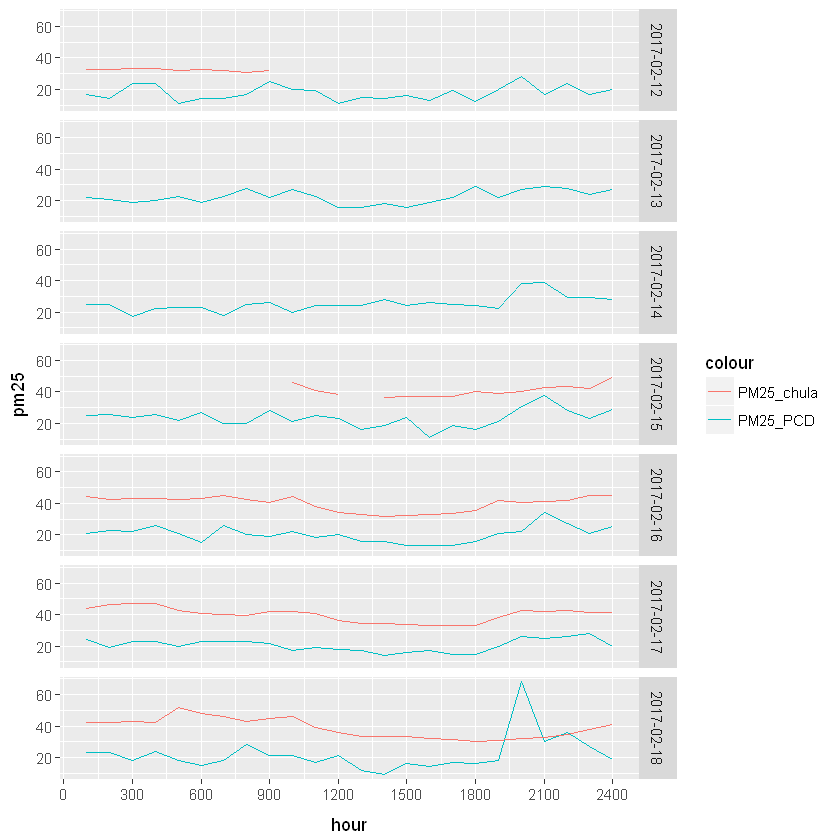

In [197]:
ggplot(sub2w3, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

Warning message:
"Removed 2 rows containing missing values (geom_path)."

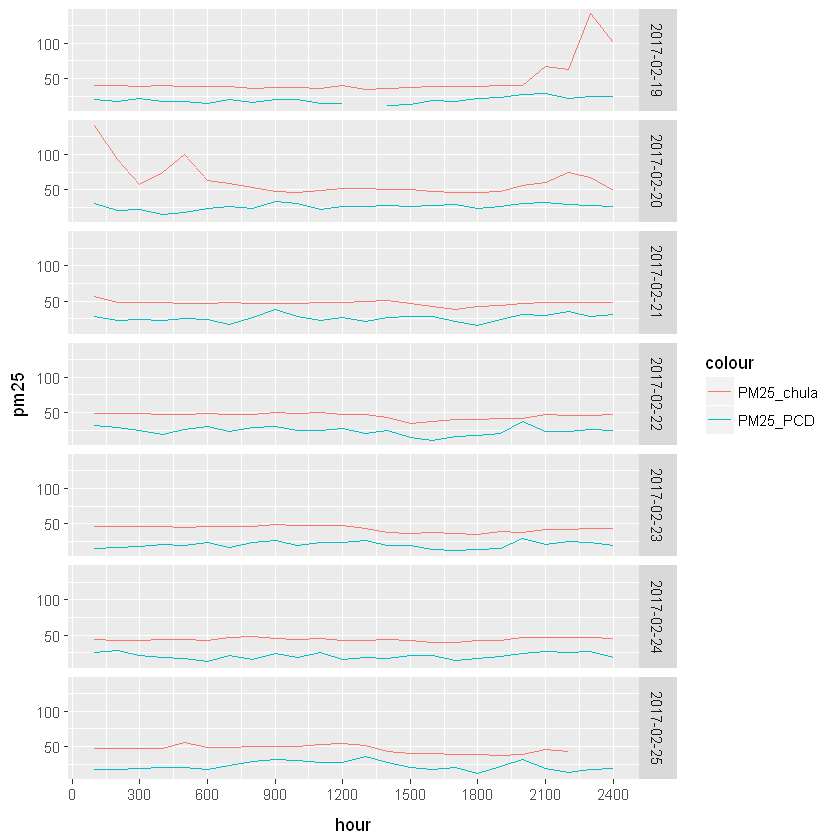

In [198]:
ggplot(sub2w4, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)

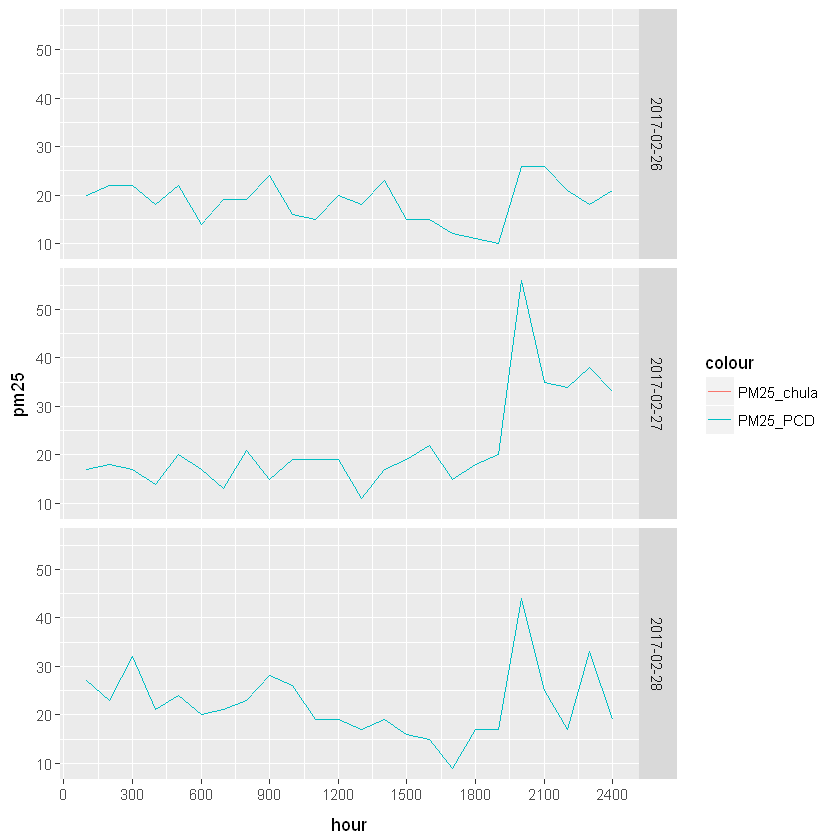

In [199]:
ggplot(sub2w5, aes(hour)) + scale_x_continuous(name ="hour", breaks = seq(0,2400,300)) + 
geom_line(aes(y = pm25, colour = "PM25_PCD")) + geom_line(aes(y = myavgpm25, colour = "PM25_chula"))+
facet_grid(date~.)